**You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:**

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.
Here’s the dataset link:
Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##  Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [2]:
df = pd.read_csv(filepath_or_buffer="./dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Shape of the dataframe

In [3]:
print("The size of the dataset is:", df.shape)

The size of the dataset is: (768, 9)


##### Dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Descriptive Statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### Target variable outcome

In [6]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

##### Visualizing the value count

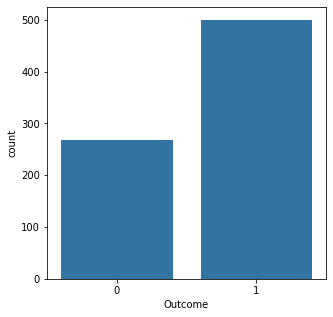

In [7]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x='Outcome', y=df['Outcome'].value_counts())
plt.show()

##### Univariate Analysis

In [8]:
features = df.columns[:-1]  # Exclude the target variable 'Outcome'
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

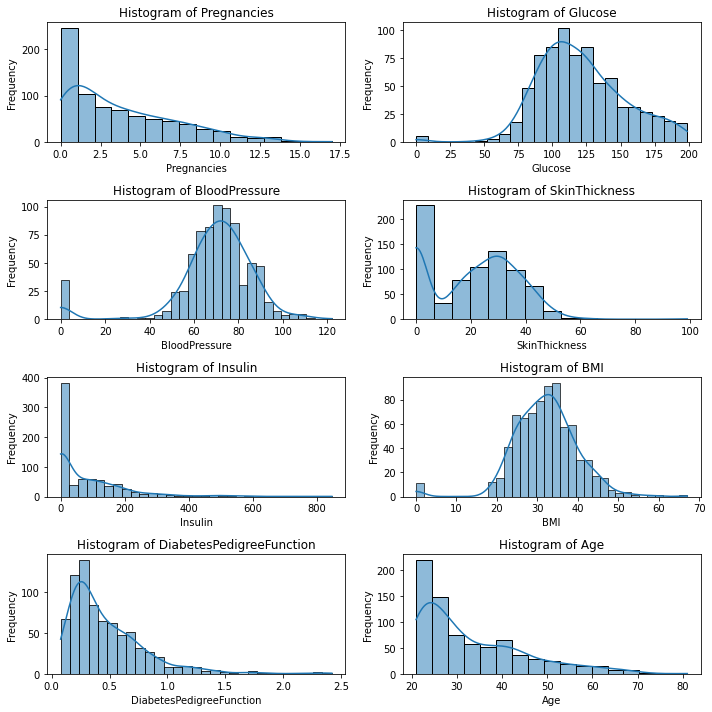

In [9]:
num_rows = len(features) // 2 + len(features) % 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Plot a histogram for numerical features and a count plot for categorical features
    if df[feature].dtype == 'int64' or df[feature].dtype == 'float64':
        sns.histplot(df[feature], ax=axes[i], kde=True)
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
    else:
        sns.countplot(x=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Count of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

##### Insights for above Univariate Analysis

- Glucose has min value as 0 which doesn't make sense. The 0 values have to be replaced with median value
- BloodPressure has min value as 0 which doesn't make sense. The 0 values have to be replaced with median value
- SkinThickness has min value as 0 which doesn't make sense. The 0 values have to be replaced with median value
- Insulin has min value as 0 which doesn't make sense. The 0 values have to be replaced with median value
- BMI has min value as 0 which doesn't make sense. The 0 values have to be replaced with median value

##### Let's plot the features with Outcome to have clear visualization of which feature at what value gives the corresponding outcome

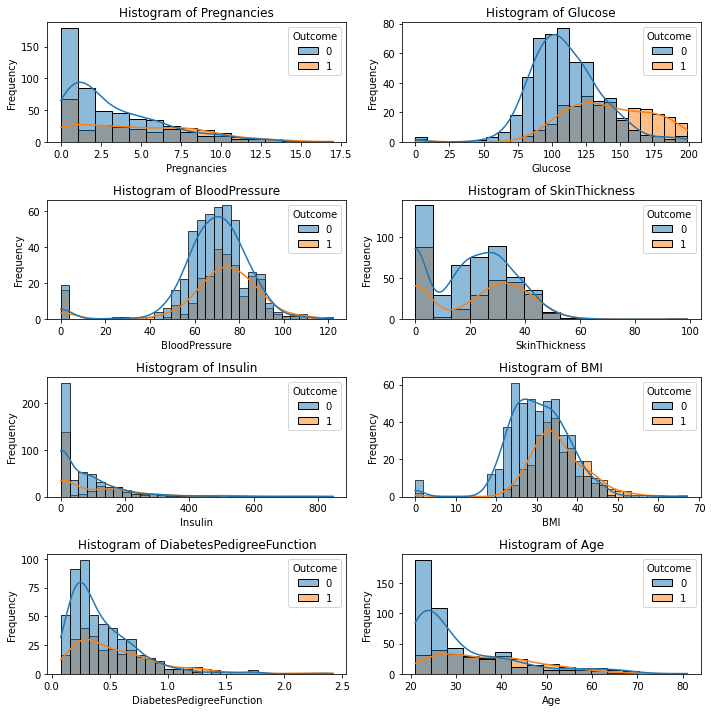

In [10]:
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Plot a histogram for numerical features and a count plot for categorical features
    if df[feature].dtype == 'int64' or df[feature].dtype == 'float64':
        sns.histplot(data= df, x=df[feature], ax=axes[i], kde=True, hue="Outcome")
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
    else:
        sns.countplot(x=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Count of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

##### Multivariate Analysis

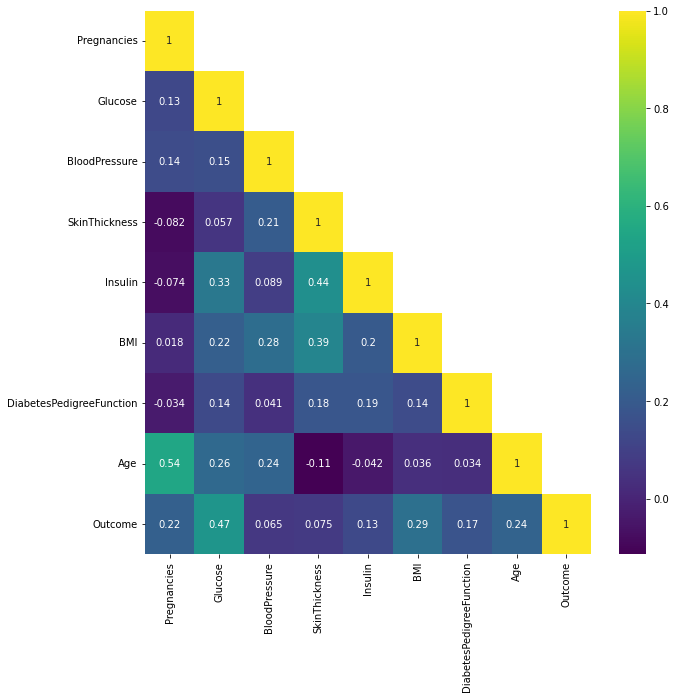

In [11]:
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True  # Set upper triangular region to True
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(method="pearson"), mask=mask, annot=True,cmap="viridis")
plt.show()

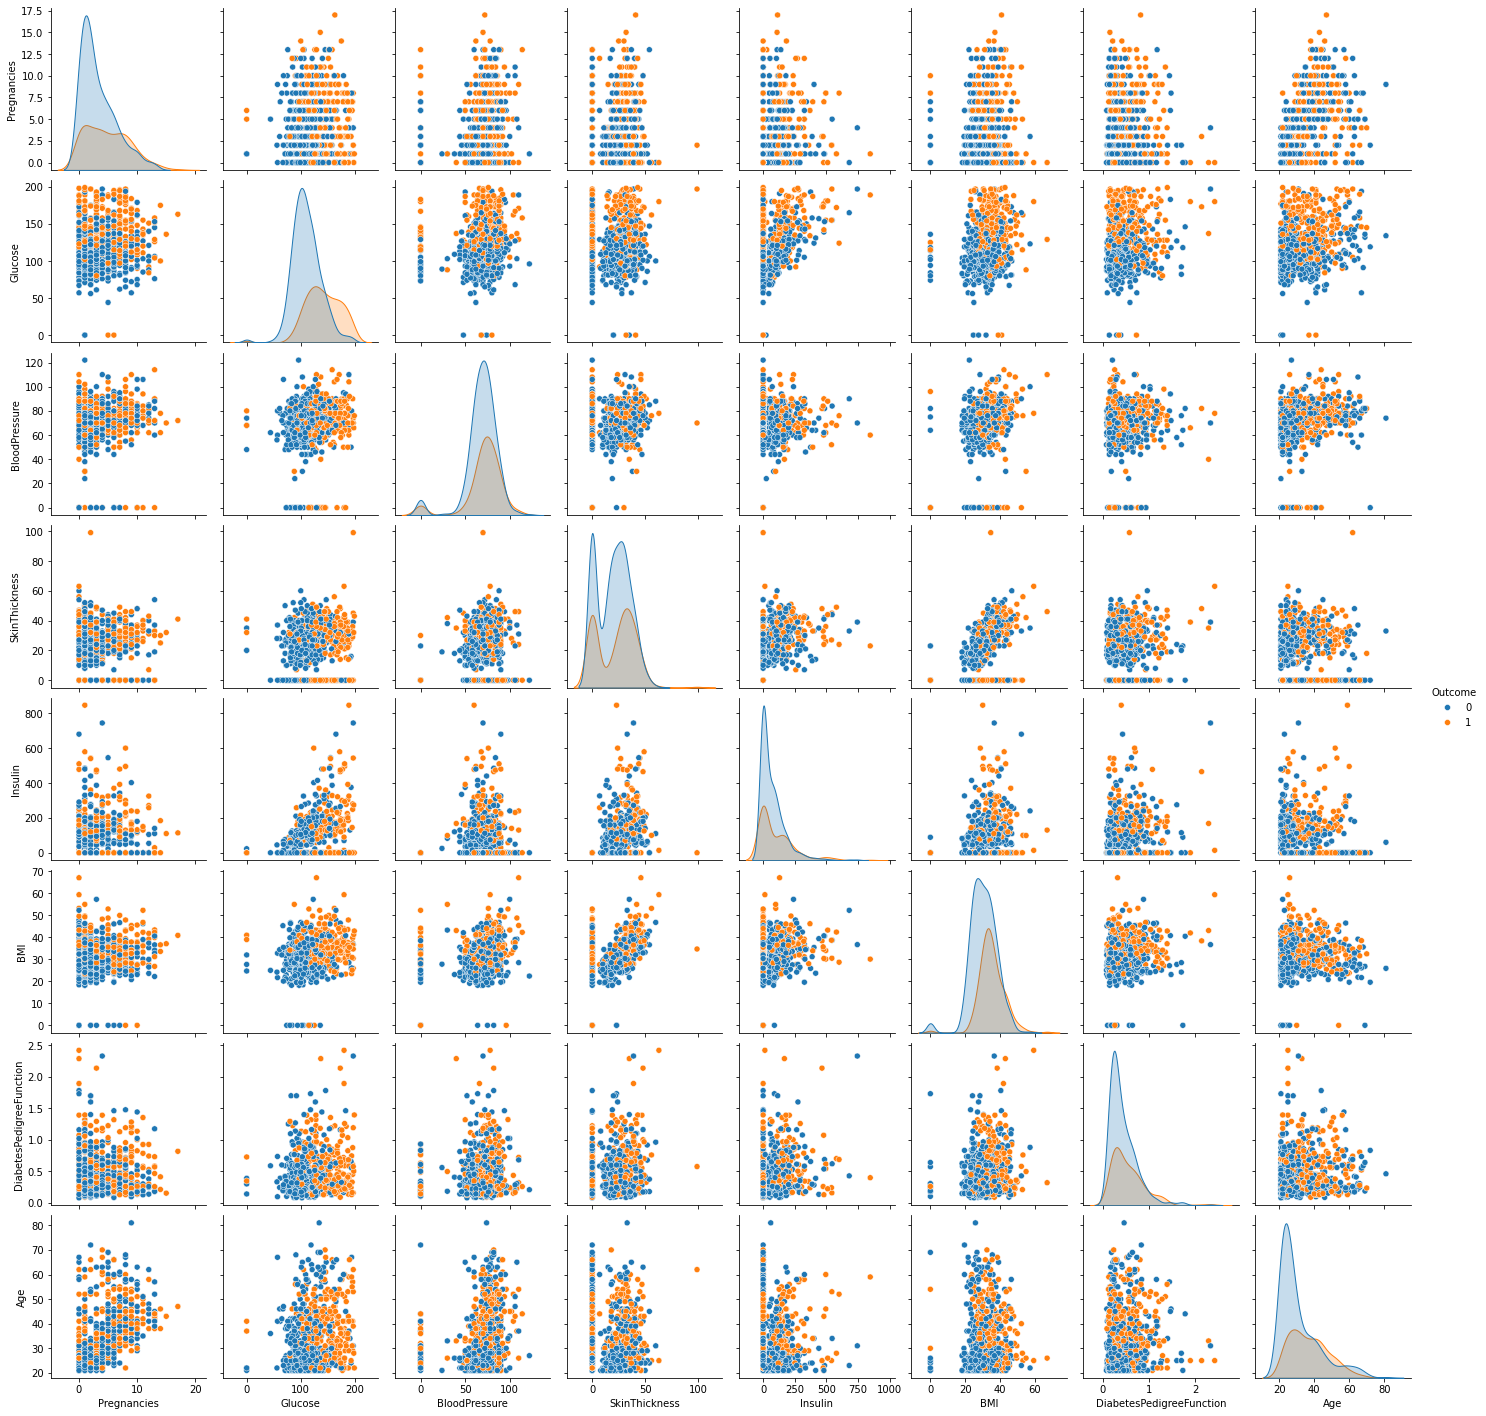

In [12]:
sns.pairplot(data=df, hue="Outcome")
plt.show()

##### Boxplot of Outcome Variable with all other variables

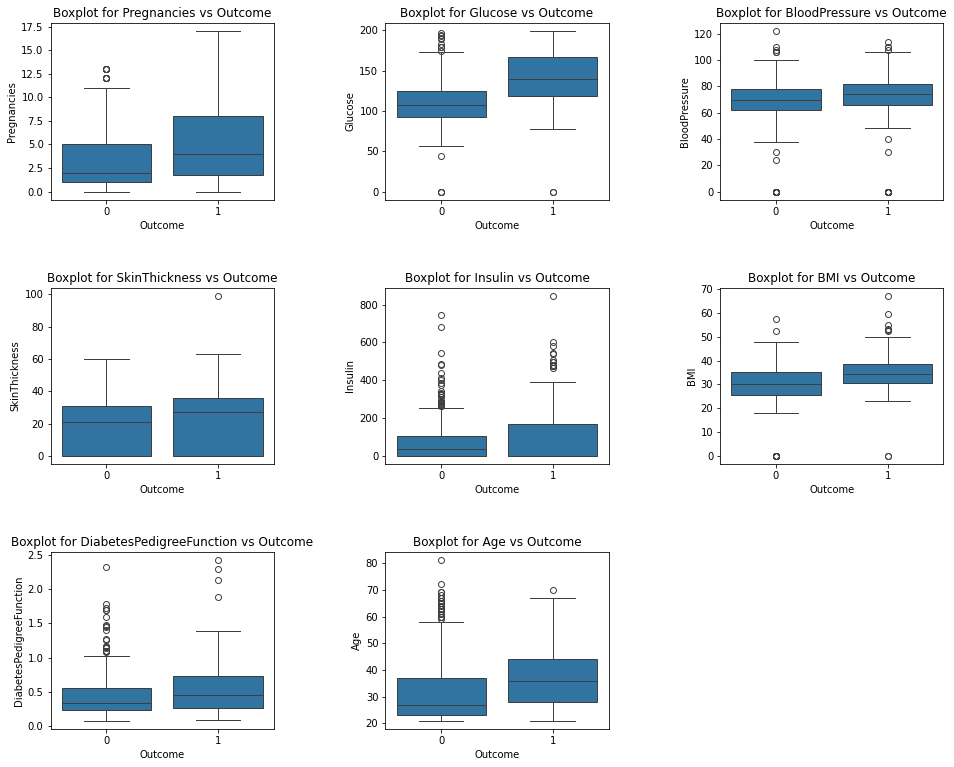

In [13]:
plt.figure(figsize=(16,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)

x=1
for i, feature in enumerate(features):
    plt.subplot(3,3,x)
    x = x+1
    sns.boxplot(data=df,x='Outcome',y=feature)
    plt.title(f'Boxplot for {feature} vs Outcome')
    
plt.show()

## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

##### Need to replace 0 values with Median as discussed in Univariate analysis of above

In [14]:
colswith_0 = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [18]:
for i, feature in enumerate(colswith_0):
    feat_median = df[feature].median()
    df[feature] = np.where(df[feature] == 0, feat_median, df[feature])

##### Let's verify the replacement is done accurately!

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### Let's find out the outliers in the datatset

In [44]:
def find_IQR(df):
    IQR = []
    min_val = []
    max_val = []
    upper_bound = []
    lower_bound = []
    for feature in df.columns:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5*iqr
        ub = q3 + 1.5*iqr
        IQR.append(iqr)
        min_val.append(df[feature].min())
        max_val.append(df[feature].max())
        upper_bound.append(ub)
        lower_bound.append(lb)
    
    df_iqr = pd.DataFrame([IQR, upper_bound, lower_bound, min_val, max_val]).T
    df_iqr.columns = ['IQR','upper_bound','lower_bound','max','min']
    df_iqr.index = df.columns
    return df_iqr

In [23]:
# SPlitting independent and dependent variables
X = df.drop(columns=["Outcome"])
Y = df["Outcome"]

In [46]:
find_IQR(X)

,IQR,upper_bound,lower_bound,max,min
Pregnancies,5.0000,13.500,-6.500,0.000,17.00
Glucose,40.5000,201.000,39.000,44.000,199.00
BloodPressure,16.0000,104.000,40.000,24.000,122.00
SkinThickness,9.0000,45.500,9.500,7.000,99.00
Insulin,96.7500,272.375,-114.625,14.000,846.00
BMI,9.1000,50.250,13.850,18.200,67.10
DiabetesPedigreeFunction,0.3825,1.200,-0.330,0.078,2.42
Age,17.0000,66.500,-1.500,21.000,81.00


##### Although this is the way to find out outliers for numerical columns, it is not an absolute necessity to handle them for Decision Tree Algorithm as it is robust enough to handle it.

##### No need for Encoding as there are no categorical features in the dataframe

## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Train Dataset:", X_train.shape, y_train.shape)
print("Test Dataset:", X_test.shape, y_test.shape)

Train Dataset: (576, 8) (576,)
Test Dataset: (192, 8) (192,)


## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

##### Let's perform GridSearch with Decision Tree algorithm

In [51]:
params = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,6,7],
    "max_features" :["sqrt", "log2"]
}

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
model = GridSearchCV(classifier, param_grid=params, cv=5, scoring="roc_auc")
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [57]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [58]:
model.best_score_

0.7861330296896086

In [59]:
classifier_best = model.best_estimator_
classifier_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [64]:
y_preds = classifier_best.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       123
           1       0.60      0.35      0.44        69

    accuracy                           0.68       192
   macro avg       0.65      0.61      0.61       192
weighted avg       0.67      0.68      0.66       192



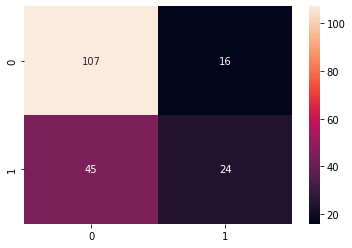

In [66]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_preds)
sns.heatmap(cf, annot=True,fmt='d')
plt.show()

##### Calculate Accuracy

In [67]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_preds)
print("Accuracy:", acc)

Accuracy: 0.6822916666666666


##### Calculate ROC_AUC score

In [79]:
from sklearn.metrics import roc_auc_score

y_pred_proba = classifier_best.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred_proba[:,-1])
print("AUC:", auc)

AUC: 0.7212206904677743


##### Plotting the ROC Curve

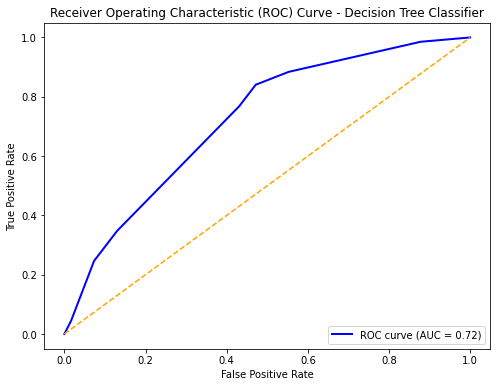

In [84]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

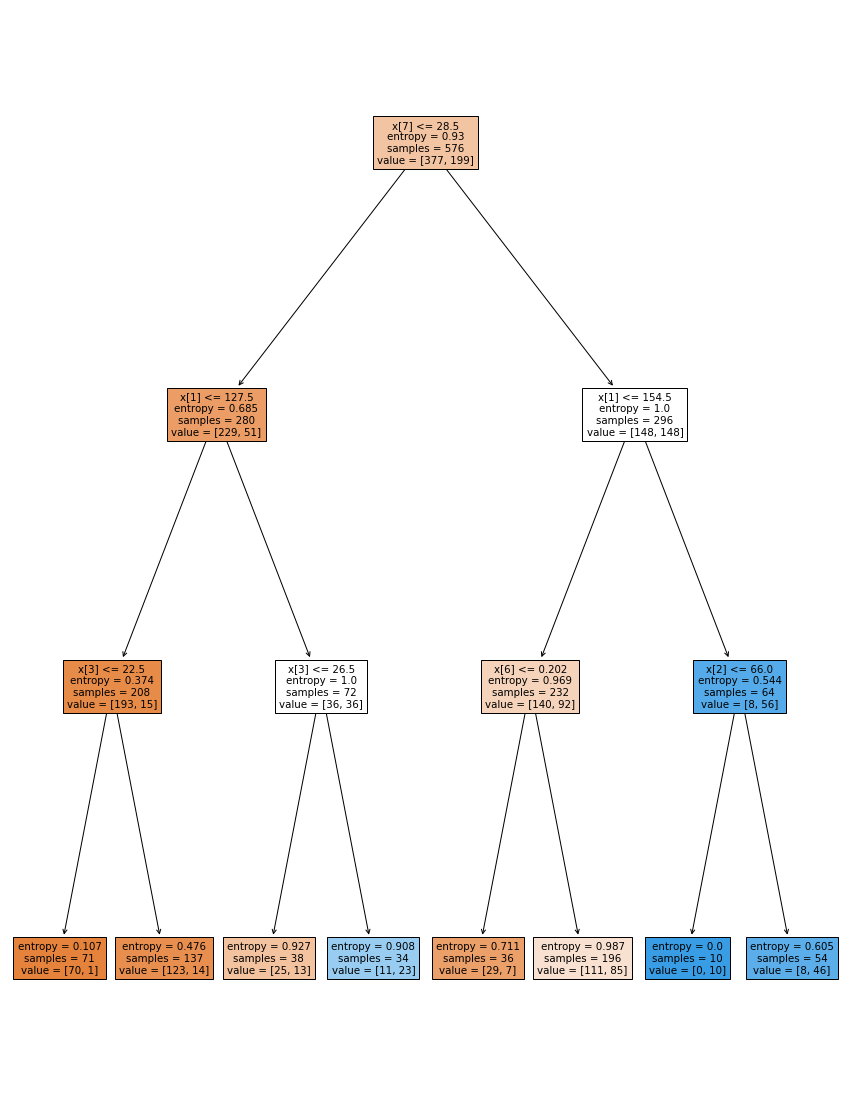

In [86]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 20))
plot_tree(classifier_best, filled=True)
plt.show()

##### Getting the feature importance with decision tree

In [88]:
feature_importances = classifier_best.feature_importances_
feature_importances = pd.Series(feature_importances)
feature_importances.index = X_train.columns
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances

Glucose                     0.540706
Age                         0.330554
SkinThickness               0.074931
DiabetesPedigreeFunction    0.039272
BloodPressure               0.014537
Pregnancies                 0.000000
Insulin                     0.000000
BMI                         0.000000
dtype: float64

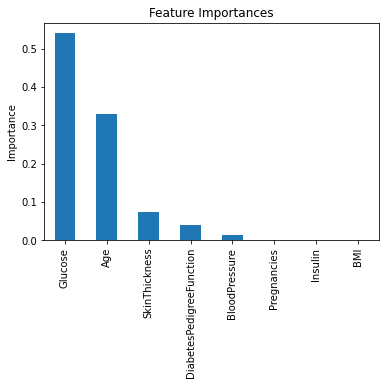

In [92]:
feature_importances.plot(kind='bar',ylabel='Importance',title='Feature Importances')
plt.show()

##### Top 4 most important Features for Predicting Diabetes are :

- Glucose
- Age
- SkinThickness
- DiabetesPedigreeFunction

## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [93]:
patient_data = {
    'Pregnancies':[3],
    'Glucose':[200],
    'BloodPressure':[80],
    'SkinThickness':[45],
    'Insulin':[512],
    'BMI':[31],
    'DiabetesPedigreeFunction':[0.160],
    'Age':[55]
}

new_df = pd.DataFrame(patient_data)
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,200,80,45,512,31,0.16,55


In [95]:
prediction = classifier_best.predict(new_df)
prediction[0]

1

In [108]:
if prediction==1:
    print('Patient is Diabetic')
    print(f'Probability of diabetic : {classifier_best.predict_proba(new_df)[0][1]}')
else:
    print('Patient is non Diabetic')
    print(f'Probaibility of diabetic : {classifier_best.predict_proba(new_df)[0][1]}')

Patient is Diabetic
Probability of diabetic : 0.8518518518518519


##### Interpreting above data with LIME

In [100]:
%pip install lime

  Using cached lime-0.2.0.1-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [103]:
from lime.lime_tabular import LimeTabularExplainer

features = list(X_train.columns)
explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=features,
                                 class_names=[0,1],
                                 verbose=True,
                                 mode='classification')

In [106]:
from warnings import filterwarnings
filterwarnings('ignore')

exp = explainer.explain_instance(new_df.values.flatten(),classifier_best.predict_proba,num_features=X_train.shape[1])

Intercept 0.21136574594280522
Prediction_local [0.73520393]
Right: 0.8518518518518519


In [107]:
exp.show_in_notebook(show_table=True)

##### Potential Risks in this Model

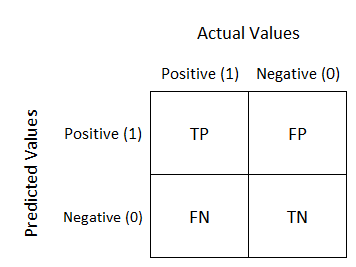

False Negatives are dangerous in this model because Patient is actually having diabetes and we predicting it as not having, can lead to major health problems to the patient.